# LGS5145 DCDC Monitor Over Long Time Period with Constant Current Load

Utalize DC Load set to 500mA

In [1]:
import pyvisa
import time

In [2]:
# Find instrument and connect
rm = pyvisa.ResourceManager()
inst_list = rm.list_resources()
inst = rm.open_resource(inst_list[0], baud_rate=115200) # RS232 connection
inst.timeout = 5000
inst.write("*RST; *CLS")    # reset to power on state, clear status
print(inst.query("*IDN?"))  # get instrument id

HEWLETT-PACKARD,34970A,0,13-2-2



In [3]:
# configure channels
inst.write("configure:voltage:dc 100,DEF,(@101)")   # input voltage, channel 1, 100V range
inst.write("configure:voltage:dc 10,DEF,(@102)")    # output voltage, channel 2, 10V range
inst.write("configure:current:dc 1,DEF,(@121)")     # input current, channel 21, 1A range
inst.write("configure:current:dc 1,DEF,(@122)")     # output current, channel 22, 1A range
time.sleep(0.1)
inst.write("configure:temperature TC,K,(@103)")     # k type TC

35

In [4]:
# get channel configurations
print(inst.query("configure? (@101)"))
print(inst.query("configure? (@102)"))
print(inst.query("configure? (@121)"))
print(inst.query("configure? (@122)"))
print(inst.query("configure? (@103)"))

"VOLT +1.000000E+02,+3.000000E-04"

"VOLT +1.000000E+01,+3.000000E-05"

"CURR +1.000000E+00,+3.000000E-06"

"CURR +1.000000E+00,+3.000000E-06"

"TEMP TC,K,+1.000000E+00,+3.000000E-06"



In [17]:
# configure scanning

''' settings '''
scanIntervals = 10      # Delay in secs, between scans
test_duration_hrs = 2   # how long to run test
numberScans = (test_duration_hrs*3600) / scanIntervals         # Number of scan sweeps to measure
# channelDelay = 0.1      # Delay, in secs, between relay closure and measurement
scanlist = "(@101:102,103,121:122)"

# setup scan list
inst.write("ROUTE:SCAN " + scanlist)
numberChannels = int(inst.query("ROUTE:SCAN:SIZE?"))
print("number of channels: {}".format(numberChannels))

# reading format
# inst.write("FORMAT:READING:CHAN OFF") # dont return channel number
# inst.write("FORMAT:READING:TIME OFF") # dont return time

# channel delay
# inst.write("ROUT:CHAN:DELAY " + str(channelDelay)+ "," + scanlist)

# setup when scanning starts and interval rate
inst.write("TRIG:COUNT " + str(numberScans)) 
inst.write("TRIG:SOUR TIMER")
inst.write("TRIG:TIMER " + str(scanIntervals))

#start the scan
inst.write("INIT")  # start scan

number of channels: 5


6

In [21]:
print(inst.query("DATA:POINTS?"))

+0



In [20]:
# Collect data
print("Vin, Vout, TC, Iin, Iout")

dataPts = int(inst.query("DATA:POINTS?"))
dataPts = int(dataPts/5)

for v in range(0, dataPts):

    # read data
    vin_str = inst.query("DATA:REMOVE? 1")
    vout_str = inst.query("DATA:REMOVE? 1")
    tc_str = inst.query("DATA:REMOVE? 1")
    iin_str = inst.query("DATA:REMOVE? 1")
    iout_str = inst.query("DATA:REMOVE? 1")

    vin_str = vin_str.replace('\r\n', '')
    vout_str = vout_str.replace('\r\n', '')
    tc_str = tc_str.replace('\r\n', '')
    iin_str = iin_str.replace('\r\n', '')
    iout_str = iout_str.replace('\r\n', '')

    # print data
    print("{}, {}, {}, {}, {}".format(vin_str, vout_str, tc_str, iin_str, iout_str))

    time.sleep(0.1)



Vin, Vout, TC, Iin, Iout
+4.50575770E+01, +5.00878300E+00, +2.48930000E+01, +1.33510000E-04, +2.88000000E-05
+4.50608400E+01, +5.00809090E+00, +2.47540000E+01, +1.37440000E-04, +5.24000000E-06
+4.50383900E+01, +4.91227020E+00, +6.44580000E+01, +6.96139300E-02, +5.00904220E-01
+4.50366930E+01, +4.91612230E+00, +7.15920000E+01, +6.96872300E-02, +5.00917310E-01
+4.50379980E+01, +4.91861640E+00, +7.58350000E+01, +6.97369700E-02, +5.00910770E-01
+4.50361710E+01, +4.92019640E+00, +7.88170000E+01, +6.97618400E-02, +5.00902910E-01
+4.50372150E+01, +4.92167200E+00, +8.10390000E+01, +6.97814700E-02, +5.00897680E-01
+4.50383900E+01, +4.92270360E+00, +8.27750000E+01, +6.97945600E-02, +5.00892440E-01
+4.50365630E+01, +4.92370910E+00, +8.42630000E+01, +6.98272800E-02, +5.00876740E-01
+4.50385210E+01, +4.92459700E+00, +8.54310000E+01, +6.98429900E-02, +5.00891130E-01
+4.50352570E+01, +4.92524990E+00, +8.65410000E+01, +6.98534600E-02, +5.00889820E-01
+4.50393040E+01, +4.92591590E+00, +8.73800000E+01, 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("lgs5145_45Vin_long_cc.csv")
df.head()

,Vin,Vout,TC,Iin,Iout
0,45.057577,5.008783,24.893,0.000134,0.000029
1,45.060840,5.008091,24.754,0.000137,0.000005
2,45.038390,4.912270,64.458,0.069614,0.500904
3,45.036693,4.916122,71.592,0.069687,0.500917
4,45.037998,4.918616,75.835,0.069737,0.500911


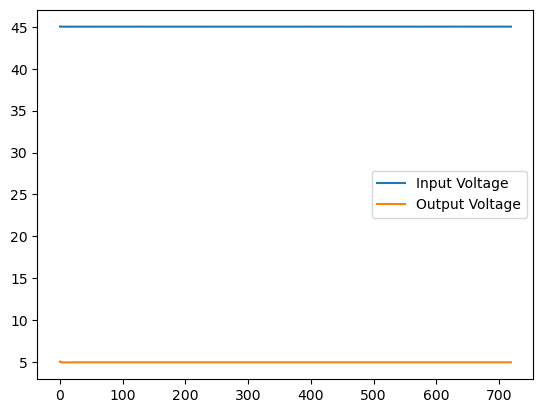

In [23]:
plt.plot(df['Vin'], label = "Input Voltage")
plt.plot(df[' Vout'], label = "Output Voltage")
plt.legend()
plt.show()

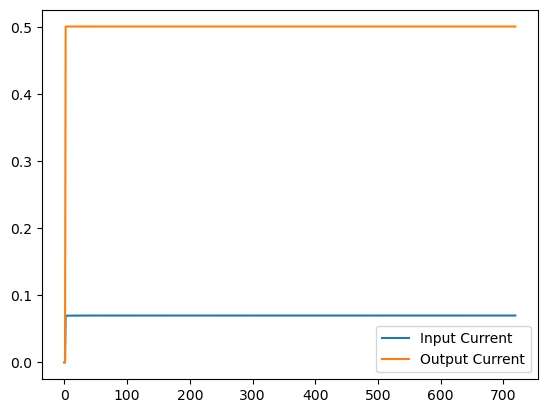

In [24]:
plt.plot(df[" Iin"], label = "Input Current")
plt.plot(df[' Iout'], label = "Output Current")
plt.legend()
plt.show()

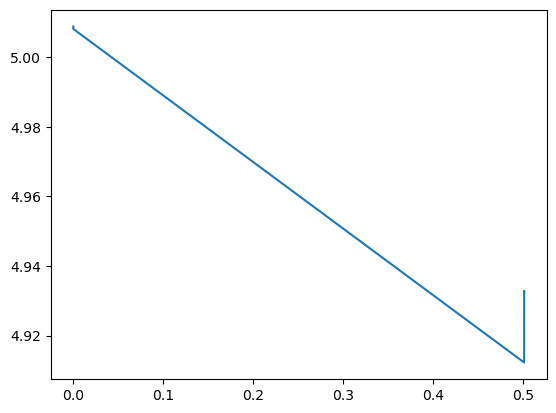

In [25]:
plt.plot(df[' Iout'], df[' Vout'])
plt.show()

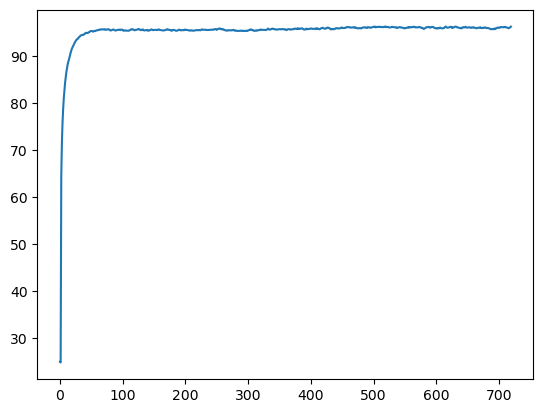

In [26]:
plt.plot(df[' TC'])
plt.show()